## Project Overview
The main goal of this project is to analyze this data, and create a report so that stakeholders in a small winery are able to successfully enter the market. I want to focus my attention several characteristics: most reviewed wines; price; points; and region. This study will primarily rely on classical statistical analysis in the form of visualizations. This is a technique I have learned from my current line of work, because the goal of a report should be to present data in conjunction with some talking points in a brief, concise way. 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings #This is so we can see all cols of a dataset in a terminal
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None) #From this point on, all cols will be visible in the terminal
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
#This function looks at some general characteristics of the data as well as the first five rows of data
def data_peek_fn(wine_dataset):
    return wine_dataset.info(),wine_dataset.shape,wine_dataset.head()

#After the first look at the data, I want to see how many blanks there are within my data
#This function enumerates nulls and counts them
def null_checker_fn(wine_dataset):
    return wine_dataset.isna().any(), wine_dataset.isna().sum()

#That is a lot of nulls in my dataset. Let's clean that up with the next function and look at the data again
def basic_data_clean_fn(wine_dataset):
    reshaped_wine_dataset = wine_dataset.dropna()
    return reshaped_wine_dataset.info(), reshaped_wine_dataset.shape, reshaped_wine_dataset.head()
print(basic_data_clean_fn(wine_dataset))
#Let's look at some summary stats for points and price
#Remember if your col names are upper or lowercase (wine data cols are lowercase)
def summary_stats(wine_dataset):
    reshaped_wine_dataset = wine_dataset.dropna()
    wine_points = wine_dataset['points']
    wine_price = wine_dataset['price']
    print("Summary stats of the wine points:", wine_points.describe())
    print("Summary stats of the wine prices:", wine_price.describe())
print(summary_stats(wine_dataset))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54170 entries, 3 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      54170 non-null  object 
 1   designation  54170 non-null  object 
 2   points       54170 non-null  int64  
 3   price        54170 non-null  float64
 4   province     54170 non-null  object 
 5   region_1     54170 non-null  object 
 6   taster_name  54170 non-null  object 
 7   title        54170 non-null  object 
 8   variety      54170 non-null  object 
 9   winery       54170 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.5+ MB
(None, (54170, 10),   country                         designation  points  price  \
3      US                Reserve Late Harvest      87   13.0   
4      US  Vintner's Reserve Wild Child Block      87   65.0   
5   Spain                        Ars In Vitro      87   15.0   
6   Italy                             Belsito   

In [13]:
# Looking at the most frequently reviewed wine.
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
wineCritFreq = wine_dataset[["taster_name","variety"]]
wineNames  = wine_dataset["variety"]
wineVarietyCount = wineCritFreq.groupby("variety").count()
wineVarietyCountSorted = wineVarietyCount.sort_values("taster_name",ascending = False)
wineVariety1000 = wineVarietyCountSorted[wineVarietyCountSorted["taster_name"] > 1000]
# Sum all the values in the taster name column. Use this to make a relative pie chart for the top 5 wines.
# print(wineVariety1000["taster_name"].sum())  # There are 82,017 reviews of the top 1000 wines
wineVariety1000["Relative Percent"] = (wineVariety1000["taster_name"] / 82017) * 100
print(wineVariety1000) # Shows how many reviews and their relative perccentage

                            taster_name  Relative Percent
variety                                                  
Pinot Noir                        10319         12.581538
Chardonnay                         8943         10.903837
Red Blend                          7109          8.667715
Bordeaux-style Red Blend           6390          7.791068
Cabernet Sauvignon                 6271          7.645976
Riesling                           4935          6.017045
Sauvignon Blanc                    4020          4.901423
RosÃ©                              3315          4.041845
Syrah                              3140          3.828475
Malbec                             2583          3.149347
Portuguese Red                     2466          3.006694
Merlot                             2099          2.559226
Sangiovese                         1997          2.434861
Nebbiolo                           1981          2.415353
White Blend                        1778          2.167843
Tempranillo   

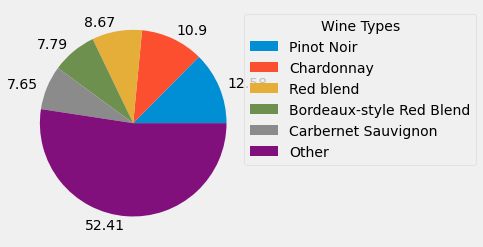

In [14]:
# Pie chart for the top 10 wines. The remianing wines will be in the other category
# Due to how the results are agreggated, I have to make the pie chart another way
# I rounded to two decimal places to make the math easier
otherPercent = 100 - (12.58 + 10.9 + 8.67 + 7.79 + 7.65)
otherPerRounded = 52.41
wines = ['Pinot Noir', 'Chardonnay', 'Red blend', 'Bordeaux-style Red Blend', 'Carbernet Sauvignon','Other']
percents = [12.58, 10.9, 8.67, 7.79, 7.65, otherPerRounded]
plt.pie(percents, labels = percents)
plt.legend(wines, title = 'Wine Types',bbox_to_anchor = (2,1),  loc = 'upper right')
# The bbox_to_anchor  = (x,y) allowed me to get the legend off the chart itself
plt.show()

Here, it is easier to see that the top five wines constitute for almost half of wine reviews totaled. Within the top five wines, pinot noir and chardonnay are the two most prominent slices. The next step in this analysis, would be to look at pricing and points to see if they have an influence on what wines are reviewed the most.
Summary stats for wine pricing: 
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Summary stats for wine points (rating):
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
In the cell below, I will construct two bell curves to better visualize the data

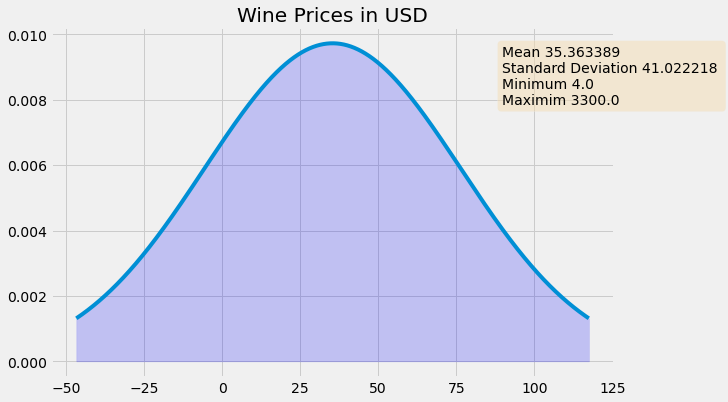

In [15]:
# Wine pricing Bell Curve

# Initialize values
mean = 35.363389
std = 41.022218
minprice = 4.0
maxprice = 3300.0
upperBound = mean + (2 * std)
lowerBound = mean - (2 * std)

# Define x-values
# np.arange(lowestValue, largestValue, increment between points)
x = np.arange(lowerBound,upperBound,0.01)  

# Define y-values 
# normal probability distribution takes the arguments x-values, mean, and standard deviation
y = norm.pdf(x,mean,std)

# Define the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

# Descriptive textbox
textstr = f'Mean {mean}  \nStandard Deviation {std} \nMinimum {minprice} \nMaximim {maxprice}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Fill the plot with color
x_fill = np.arange(lowerBound, upperBound, 0.001)
y_fill = norm.pdf(x_fill, mean, std)
ax.fill_between(x_fill,y_fill,0, alpha=0.2, color='blue')


# Define the characteristics of the plot
plt.title("Wine Prices in USD")
plt.style.use('fivethirtyeight')
plt.show()

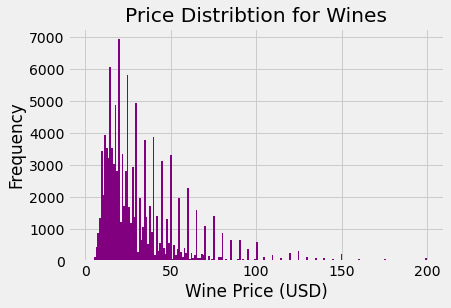

In [16]:
# Histogram of pricing data to compare with the normal distribution
# This was done because there are over 50k reviews
# Dataset
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")

# Defining the histogram
x = wine_dataset['price']
plt.hist(x, bins = 'auto',range = (0,200), color = 'purple')
plt.title("Price Distribtion for Wines")
plt.ylabel("Frequency")
plt.xlabel("Wine Price (USD)")
plt.show()

It appears that the pricing does not follow the normal distribution that was modeled earlier. The mode would better answer the question central tendency behavior. Based on the result of the cell below, the mode of the prices is 20 USD. 

In [17]:
# Finding the mode of the prices column 
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
# x = wine_dataset['price']
# print(x.mode())  # The most common price is 20 USD

# Find the other popular wine prices
wine_dataset_slice = wine_dataset[["price","variety"]]
wine_variety_count = wine_dataset_slice.groupby("price").count()  # By default will drop null values
wine_count_sorted = wine_variety_count.sort_values("variety",ascending = False)
wine_filtered = wine_count_sorted[wine_count_sorted["variety"] > 4000]
print(wine_filtered)  # Top Ten most popular pricings

       variety
price         
20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883


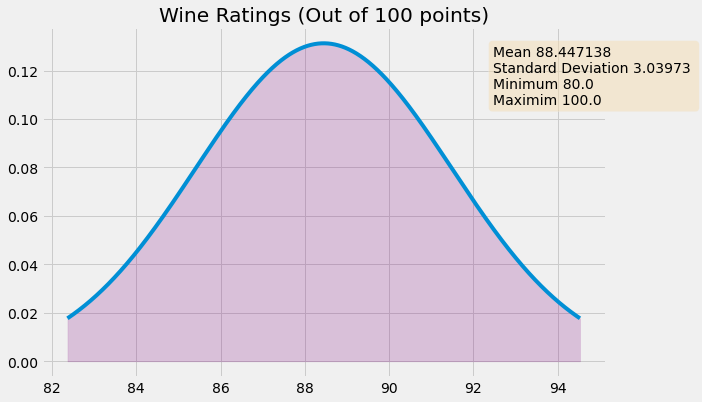

In [18]:
# Wine rating Bell Curve
# Initialize values
mean = 88.447138
std = 3.039730
minpoint = 80.0
maxpoint = 100.0
upperBound = mean + (2 * std)
lowerBound = mean - (2 * std)

# Define x-values
# np.arange(lowestValue, largestValue, increment between points)
x = np.arange(lowerBound,upperBound,.001)  

# Define y-values 
# normal probability distribution takes the arguments x-values, mean, and standard deviation
y = norm.pdf(x,mean,std)

# Define the plot
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y)

# Descriptive textbox
textstr = f'Mean {mean}  \nStandard Deviation {std} \nMinimum {minpoint} \nMaximim {maxpoint}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Fill the plot with color
x_fill = np.arange(lowerBound, upperBound, 0.001)
y_fill = norm.pdf(x_fill, mean, std)
ax.fill_between(x_fill,y_fill,0, alpha=0.2, color='purple')


# Define the characteristics of the plot
plt.title("Wine Ratings (Out of 100 points)")
plt.style.use('fivethirtyeight')
plt.show()

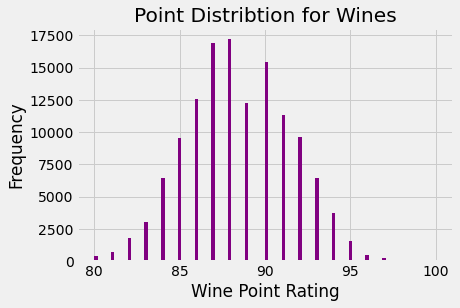

In [19]:
# Histogram of the points to compare with the bell curve
# This was done because there are over 50k reviews
# Dataset
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")

# Defining the histogram
x = wine_dataset['points']
plt.hist(x, bins = 'auto', color = 'purple')
plt.title("Point Distribtion for Wines")
plt.ylabel("Frequency")
plt.xlabel("Wine Point Rating")
plt.show()

The data seems to somewhat resemble the normal distribution, and means that the mean of 88 points is a reliable measure of central tendency. In the next part of the analysis, I have several questions I want to answer as manipulate the data. How many unique regions are there? Is there a bias towards one region of the world?

In [20]:
# Region and Province Analysis
# Region refers to a state or a large area, while province really is more associated with a winery
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
# Count the total number of unique regions
total_provinces = len(pd.unique(wine_dataset['province']))
# print(total_provinces)  # There are 426 unique regions
print(pd.unique(wine_dataset["province"]))  # This is not ideal to apply regex to
total_regions = len(pd.unique(wine_dataset['region_1']))
# print(total_regions)  # 1230 total unique wineries

['Sicily & Sardinia' 'Douro' 'Oregon' 'Michigan' 'Northern Spain' 'Alsace'
 'Rheinhessen' 'California' 'Mosel' 'Other' 'Mendoza Province' 'Virginia'
 'Beaujolais' 'Colchagua Valley' 'Southern Italy' 'Maule Valley'
 'Bordeaux' 'Maipo Valley' 'Washington' 'Central Italy' 'Champagne'
 'Burgundy' 'South Australia' 'Tejo' 'Rapel Valley' 'Galicia'
 'France Other' 'Tuscany' 'Burgenland' 'New York' 'Leyda Valley'
 'Piedmont' 'Stellenbosch' 'Simonsberg-Stellenbosch' 'Walker Bay'
 'Alentejano' 'Central Spain' 'Southwest France' 'Aconcagua Valley'
 'Loncomilla Valley' 'Marlborough' 'Northeastern Italy'
 'Casablanca Valley' 'Veneto' 'Western Cape' 'Judean Hills' 'Alentejo'
 'Coastal Region' 'RhÃ´ne Valley' 'Galilee' 'Beira Atlantico' 'Tokaj'
 'Leithaberg' 'Santorini' 'Kremstal' 'Catalonia' 'Recas' "Hawke's Bay"
 'CuricÃ³ Valley' 'LimarÃ\xad Valley' 'Colchagua Costa'
 'Languedoc-Roussillon' 'Provence' 'Victoria' 'Rheingau' 'Tokaji'
 'Naoussa' 'Valle de Guadalupe' 'Central Valley' 'LontuÃ© Valley'
 

### Minimizing overhead costs, while keeping the goal in mind
Since the data does not lend itself to being organized with regex, I am going to use a groupby statement to get a tally on the provinces. From here, I want to subset that data in a separate cell, and compare it to common costs such as land, water (and average rainfall), etc.

In [21]:
# Province Data
wine_dataset = pd.read_csv("Wine Review Data Reformatted CSV.csv")
wine_dataset_slice = wine_dataset[["province","variety"]]
# wineNames  = wine_dataset["variety"]
wine_variety_count = wine_dataset_slice.groupby("province").count()  # By default will drop null values
wine_count_sorted = wine_variety_count.sort_values("variety",ascending = False)
print(wine_count_sorted)


                                 variety
province                                
California                         36247
Washington                          8639
Bordeaux                            5941
Tuscany                             5897
Oregon                              5373
Burgundy                            3980
Northern Spain                      3851
Piedmont                            3729
Mendoza Province                    3264
Veneto                              2716
New York                            2688
Alsace                              2440
Northeastern Italy                  2138
Loire Valley                        1856
Sicily & Sardinia                   1797
Champagne                           1613
Southwest France                    1503
Southern Italy                      1349
South Australia                     1349
Provence                            1346
Douro                               1281
Central Italy                       1233
Catalonia       

                  Wines Produced
California                 36247
Washington                  8639
Bordeaux                    5941
Tuscany                     5987
Oregon                      5373
Burgundy                    3980
Northern Spain              3851
Piedmont                    3729
Mendoza Province            3264
Veneto                      2716


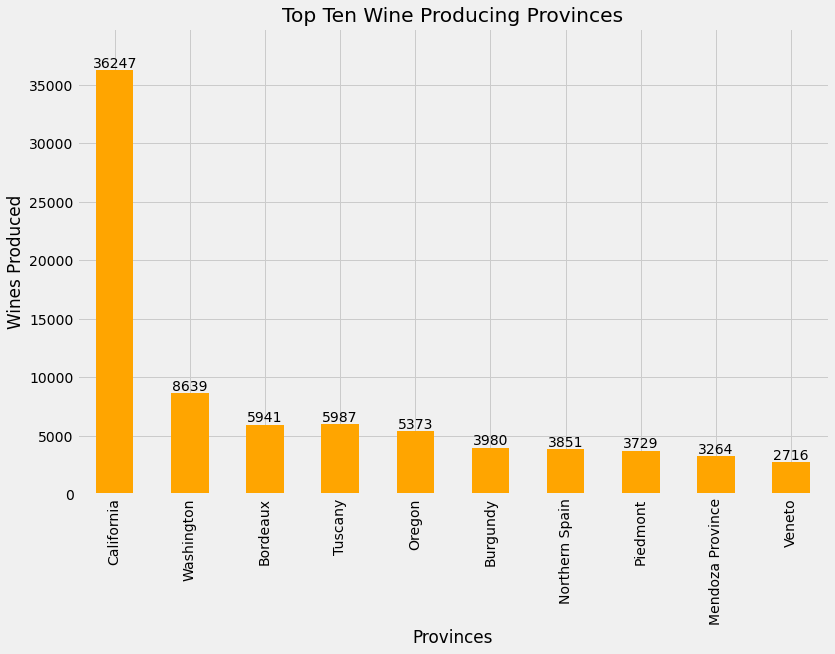

In [22]:
# Visualization of province data
# Data pulled from cell above for bar chart 
Provinces = ["California","Washington","Bordeaux","Tuscany","Oregon","Burgundy","Northern Spain","Piedmont","Mendoza Province","Veneto"]
wines_reviewed = [36247,8639,5941,5987,5373,3980,3851,3729,3264,2716]
# This makes the freq a col and the province names go where integers would go
df = pd.DataFrame({"Wines Produced": wines_reviewed}, index = Provinces)
print(df)  # This is assuming each wine reviewed is a unique product
# Creating the plot
ax = df.plot(kind='bar', figsize=(12, 8), color = "orange", title= "Top Ten Wine Producing Provinces",
             xlabel= "Provinces", ylabel= "Wines Produced", legend=False)
# Annotate
ax.bar_label(ax.containers[0], label_type='edge')

# Pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

plt.show()
# Tweak the fontsize of the title and axes text size

## Future Direction of Project
With the above graphics and information, I have enough insight to proceed to phase two of the analysis. This will begin with mapping out overhead costs of a winery, and what wines seem to be the most successful from the top ten provinces, relative to the top five wines. 